<a href="https://colab.research.google.com/github/Piotr94/Fashion_MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)

In [0]:
train_transform = torchvision.transforms.Compose(
    # data augmentation: rotation, flipping and adding noise
    [torchvision.transforms.RandomRotation(25),
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Lambda(lambda x: x + 0.01*torch.rand(x.shape)),
     torchvision.transforms.Normalize((0.5,), (0.5,))]
)
test_transform = torchvision.transforms.Compose(
     [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5,), (0.5,))]
)
trainset = torchvision.datasets.FashionMNIST(root="./", train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ("T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
           "Sneaker", "Bag", "Ankle boot")

0it [00:00, ?it/s]

26427392it [00:02, 10760590.12it/s]                              


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 94134.27it/s]                            
0it [00:00, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


4423680it [00:01, 3890386.87it/s]                             
0it [00:00, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


8192it [00:00, 32270.85it/s]            

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Exchange convolution layers with kernels 5x5 for two stacked convolution layers with kernels 3x3
    # there is less parameters so learning is faster and overfitting is smaller
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(1, 32, 3),
        nn.ReLU(),
        nn.BatchNorm2d(32), # batch normalization after every layer except the last one
    )
    self.conv_layer3 = nn.Sequential(
        nn.Conv2d(32, 32, 3),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2)
    )
    # additional convolution layer with padding to extract features of higher level
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(32, 32, 3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
    )
    self.conv_layer4 = nn.Sequential(
        nn.Conv2d(32, 64, 3),
        nn.ReLU(),
        nn.BatchNorm2d(64),
    )
    self.conv_layer5 = nn.Sequential(
        nn.Conv2d(64, 64, 3),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2)
    )
    self.fc1 = nn.Sequential(
        nn.Dropout(0.3), # Droput to delay moment of overfitting
        nn.Linear(64*4*4, 100),
        nn.ReLU(),
        nn.BatchNorm1d(100),
    )
    self.fc2 = nn.Linear(100, 10, )

  def forward(self, x):
    x = self.conv_layer1(x)
    x = self.conv_layer2(x)
    x = self.conv_layer3(x)
    x = self.conv_layer4(x)
    x = self.conv_layer5(x)
    x = x.view(-1, 64*4*4)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv_layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_layer4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_layer5): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    

In [0]:
criterion = nn.CrossEntropyLoss()
# weight decay is set to small value, bigger values were slowing down learning and causing converging at smaller level
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, momentum=0.7, weight_decay=0.00005, nesterov=True)


Epoch 0
training loss: 0.572
training accuracy: 79.55 %
validation loss: 0.389
validation accuracy: 85.97 %
model saved

Epoch 1


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-pac

training loss: 0.413
training accuracy: 85.19 %
validation loss: 0.353
validation accuracy: 87.34 %
model saved

Epoch 2
training loss: 0.363
training accuracy: 86.82 %
validation loss: 0.309
validation accuracy: 88.78 %
model saved

Epoch 3
training loss: 0.343
training accuracy: 87.64 %
validation loss: 0.307
validation accuracy: 89.00 %
model saved

Epoch 4
training loss: 0.332
training accuracy: 88.04 %
validation loss: 0.311
validation accuracy: 88.67 %

Epoch 5
training loss: 0.314
training accuracy: 88.63 %
validation loss: 0.274
validation accuracy: 90.51 %
model saved

Epoch 6
training loss: 0.300
training accuracy: 89.10 %
validation loss: 0.274
validation accuracy: 90.30 %

Epoch 7
training loss: 0.291
training accuracy: 89.42 %
validation loss: 0.272
validation accuracy: 90.12 %
model saved

Epoch 8
training loss: 0.284
training accuracy: 89.74 %
validation loss: 0.269
validation accuracy: 90.31 %
model saved

Epoch 9
training loss: 0.275
training accuracy: 90.00 %
validati

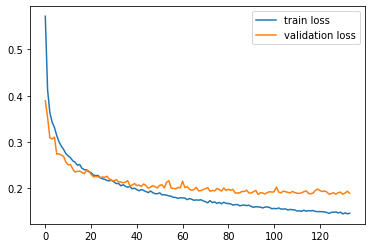

In [0]:
min_val_loss = float('inf')
epochs_wo_improve = 0
model_path = "./fashion_mnist_model"
train_losses = []
validation_losses = []
for epoch in range(250):
  print("\nEpoch %d" % (epoch,)) 
  total = 0
  correct = 0
  running_loss = 0.0
  net = net.train()
  for i, data in enumerate(trainloader, 1):
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = net(inputs)
    total += labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print('training loss: %.3f' %
        (running_loss / i,))
  train_losses.append(running_loss / i)
  print('training accuracy: %.2f %%' % 
        (100*correct/total,))

  with torch.no_grad():
    net = net.eval()
    val_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(testloader, 1):
      inputs, labels = data[0].to(device), data[1].to(device)

      outputs = net(inputs)
      val_loss += criterion(outputs, labels).item()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print('validation loss: %.3f' % 
        (val_loss/i,))
  validation_losses.append(val_loss / i)
  print('validation accuracy: %.2f %%' % 
        (100*correct/total,))
  # early stopping with patience = 40 epochs
  if val_loss < min_val_loss:
    print("model saved")
    torch.save(net, model_path)
    min_val_loss = val_loss
    epochs_wo_improve = 0
  else:
    epochs_wo_improve += 1
    if epochs_wo_improve == 40:
      net = torch.load(model_path)
      break

print("Training is finished")
plt.plot(train_losses)
plt.plot(validation_losses)
plt.legend(["train loss", "validation loss"])
plt.show()

In [0]:
with torch.no_grad():
  net = net.eval()
  val_loss = 0.0
  total = 0
  correct = 0
  confusion_matrix = torch.zeros(len(classes), len(classes))
  for i, data in enumerate(testloader, 1):
    inputs, labels = data[0].to(device), data[1].to(device)
    outputs = net(inputs)
    val_loss += criterion(outputs, labels).item()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    for l, p in zip(labels.view(-1), predicted.view(-1)):
      confusion_matrix[l.long(), p.long()] += 1
print('validation loss: %.3f' % 
      (val_loss/i,))

print('validation accuracy: %.2f %%\n' % 
      (100*correct/total,))
print(confusion_matrix)

validation loss: 0.187
validation accuracy: 93.49 %

tensor([[892.,   0.,  15.,  16.,   1.,   0.,  67.,   0.,   9.,   0.],
        [  0., 984.,   0.,  10.,   0.,   0.,   4.,   0.,   2.,   0.],
        [ 10.,   0., 915.,  10.,  20.,   0.,  45.,   0.,   0.,   0.],
        [ 12.,   1.,   5., 938.,  22.,   0.,  21.,   0.,   1.,   0.],
        [  1.,   0.,  41.,  18., 907.,   0.,  32.,   0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0., 980.,   0.,  15.,   0.,   5.],
        [ 79.,   0.,  45.,  23.,  53.,   0., 796.,   0.,   4.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   6.,   0., 976.,   0.,  18.],
        [  4.,   0.,   0.,   2.,   2.,   1.,   0.,   0., 991.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   6.,   0.,  24.,   0., 970.]])


Accuracy on validation set for trained model equals 93,49%. Model was trained for 134 epochs but the best weights model had after 94 epochs.
The worst accuracy is for classes Shirt (79,6%) and T-shirt (89,2%), the best for class Bag (99,3%). Again the most often model confuses objects of classes T-shirt and Shirt. Model is less biased: the most popular class was selected 1021 times, the least popular 965 times.